In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [3]:
all_files = glob.glob('myCabinetExcelData*.xls')
all_files

['myCabinetExcelData (7).xls',
 'myCabinetExcelData (3).xls',
 'myCabinetExcelData (5).xls',
 'myCabinetExcelData (4).xls',
 'myCabinetExcelData (9).xls',
 'myCabinetExcelData (6).xls',
 'myCabinetExcelData (1).xls',
 'myCabinetExcelData (2).xls',
 'myCabinetExcelData (8).xls',
 'myCabinetExcelData.xls']

In [4]:
all_files_data = []
for file in all_files:
  data_frame = pd.read_excel(file)
  all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Optimizing the induction chemotherapy regimen ...,"Peng, Hao; Tang, Ling-Long; Chen, Bin-Bin; Che...","Elsevier Science B.V., Amsterdam.",2018
1,NaN,2,Survival impact of radiotherapy interruption i...,"Yao, Ji-Jin; Zhang, Fan; Gao, Tian-Sheng; Zhan...","Elsevier Science B.V., Amsterdam.",2019
2,NaN,3,Opportunities for Energy Efficient Computing: ...,"Düben, Peter; Schlachter, Jeremy; Parishkrati,...",IEEE Computer Society,2015
3,NaN,4,A ReRAM-Based 4T2R Nonvolatile TCAM Using RC-F...,"Chang, M.; Huang, L.; Lin, W.; Chiang, Y.; Kuo...",IEEE; 1998,2016
4,NaN,5,"Determinant roles of gender and age on sii, pl...","Meng, Xianchun; Chang, Qian; Liu, Yuying; Chen...","John Wiley & Sons, Ltd",2018
...,...,...,...,...,...,...
95,NaN,96,Big Data-Driven Service Composition Using Para...,"Hossain, M. S.; Moniruzzaman, M.; Muhammad, G....",Institute of Electrical & Electronics Engineers,2016
96,NaN,97,Big Data: A Revolution That Will Transform How...,"John Walker, Saint",BLACKWELL PUBLISHERS,2014
97,NaN,98,Big data: the key to energy efficiency in smar...,"Moreno, M. V.; Dufour, L.; Skarmeta, A. F.; Ja...",Springer Science + Business Media,2016
98,NaN,99,'Big data' patentometrics for R&D decision-making,"Verma, Charu; Suri, Pradeep Kumar",Emerald Group Publishing Limited,2021


In [5]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Optimizing the induction chemotherapy regimen ...,"Peng, Hao; Tang, Ling-Long; Chen, Bin-Bin; Che...","Elsevier Science B.V., Amsterdam.",2018
1,NaN,2,Survival impact of radiotherapy interruption i...,"Yao, Ji-Jin; Zhang, Fan; Gao, Tian-Sheng; Zhan...","Elsevier Science B.V., Amsterdam.",2019
2,NaN,3,Opportunities for Energy Efficient Computing: ...,"Düben, Peter; Schlachter, Jeremy; Parishkrati,...",IEEE Computer Society,2015
3,NaN,4,A ReRAM-Based 4T2R Nonvolatile TCAM Using RC-F...,"Chang, M.; Huang, L.; Lin, W.; Chiang, Y.; Kuo...",IEEE; 1998,2016
4,NaN,5,"Determinant roles of gender and age on sii, pl...","Meng, Xianchun; Chang, Qian; Liu, Yuying; Chen...","John Wiley & Sons, Ltd",2018
...,...,...,...,...,...,...
995,NaN,96,Big data in support of the Sustainable Develop...,"Guo, Huadong; Hackmann, Heide; Gong, Ke",John Wiley & Sons Ltd,2021
996,NaN,97,Recent advance in earth observation big data f...,"Chen, Lajiao; Wang, Lizhe",John Wiley & Sons Ltd,2018
997,NaN,98,A new big data approach based on geoecological...,"Varotsos, Costas A.; Krapivin, Vladimir F.",John Wiley & Sons Ltd,2017
998,NaN,99,Call for Special Issue Papers: Soft Computing ...,"Chilamkurti, Naveen; Paul, Anand; Kumar, Akshi",Mary Ann Leibert,2020


In [6]:
all_files_data_concat.to_csv('riss_bigdata.csv', encoding='utf-8', index=False)

In [7]:
all_title = all_files_data_concat['제목']
all_title

0      Optimizing the induction chemotherapy regimen ...
1      Survival impact of radiotherapy interruption i...
2      Opportunities for Energy Efficient Computing: ...
3      A ReRAM-Based 4T2R Nonvolatile TCAM Using RC-F...
4      Determinant roles of gender and age on sii, pl...
                             ...                        
995    Big data in support of the Sustainable Develop...
996    Recent advance in earth observation big data f...
997    A new big data approach based on geoecological...
998    Call for Special Issue Papers: Soft Computing ...
999    Moth-Flame Optimization-Bat Optimization: Map-...
Name: 제목, Length: 1000, dtype: object

In [8]:
stopWords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [9]:
words = []

for title in all_title: 
  EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
  EnWordsToken = word_tokenize(EnWords.lower())
  EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
  EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
  words.append(EnWordsTokenStopLemma)

In [10]:
print(words)

[['optimizing', 'induction', 'chemotherapy', 'regimen', 'patient', 'locoregionally', 'advanced', 'nasopharyngeal', 'carcinoma', 'big', 'data', 'intelligence', 'platform', 'based', 'analysis'], ['survival', 'impact', 'radiotherapy', 'interruption', 'nasopharyngeal', 'carcinoma', 'intensity', 'modulated', 'radiotherapy', 'era', 'big', 'data', 'intelligence', 'platform', 'based', 'analysis'], ['opportunity', 'energy', 'efficient', 'computing', 'study', 'inexact', 'general', 'purpose', 'processor', 'high', 'performance', 'big', 'data', 'application'], ['reram', 'based', 'r', 'nonvolatile', 'tcam', 'using', 'rc', 'filtered', 'stress', 'decoupled', 'scheme', 'frequent', 'instant', 'search', 'engine', 'used', 'iot', 'big', 'data', 'processing'], ['determinant', 'role', 'gender', 'age', 'sii', 'plr', 'nlr', 'lmr', 'mlr', 'reference', 'interval', 'defining', 'henan', 'china', 'posteriori', 'big', 'data', 'based'], ['big', 'data', 'algorithm', 'knn', 'pls'], ['donepezil', 'use', 'emergence', 'co

In [11]:
words2 = list(reduce(lambda x, y: x+y, words))
print(words2)

['optimizing', 'induction', 'chemotherapy', 'regimen', 'patient', 'locoregionally', 'advanced', 'nasopharyngeal', 'carcinoma', 'big', 'data', 'intelligence', 'platform', 'based', 'analysis', 'survival', 'impact', 'radiotherapy', 'interruption', 'nasopharyngeal', 'carcinoma', 'intensity', 'modulated', 'radiotherapy', 'era', 'big', 'data', 'intelligence', 'platform', 'based', 'analysis', 'opportunity', 'energy', 'efficient', 'computing', 'study', 'inexact', 'general', 'purpose', 'processor', 'high', 'performance', 'big', 'data', 'application', 'reram', 'based', 'r', 'nonvolatile', 'tcam', 'using', 'rc', 'filtered', 'stress', 'decoupled', 'scheme', 'frequent', 'instant', 'search', 'engine', 'used', 'iot', 'big', 'data', 'processing', 'determinant', 'role', 'gender', 'age', 'sii', 'plr', 'nlr', 'lmr', 'mlr', 'reference', 'interval', 'defining', 'henan', 'china', 'posteriori', 'big', 'data', 'based', 'big', 'data', 'algorithm', 'knn', 'pls', 'donepezil', 'use', 'emergence', 'comorbidity', '

In [12]:
count = Counter(words2)
count

Counter({'optimizing': 1,
         'induction': 1,
         'chemotherapy': 1,
         'regimen': 1,
         'patient': 9,
         'locoregionally': 2,
         'advanced': 6,
         'nasopharyngeal': 7,
         'carcinoma': 7,
         'big': 1127,
         'data': 1252,
         'intelligence': 23,
         'platform': 31,
         'based': 93,
         'analysis': 92,
         'survival': 2,
         'impact': 16,
         'radiotherapy': 7,
         'interruption': 1,
         'intensity': 6,
         'modulated': 4,
         'era': 27,
         'opportunity': 31,
         'energy': 23,
         'efficient': 24,
         'computing': 27,
         'study': 16,
         'inexact': 1,
         'general': 2,
         'purpose': 2,
         'processor': 7,
         'high': 14,
         'performance': 18,
         'application': 40,
         'reram': 2,
         'r': 9,
         'nonvolatile': 2,
         'tcam': 2,
         'using': 58,
         'rc': 1,
         'filtered': 1,
  

In [13]:
word_count = dict()

for tag, counts in count.most_common(50):
  if(len(str(tag))>1):
    word_count[tag] = counts
    print("%s : %d" % (tag, counts))

data : 1252
big : 1127
analytics : 128
based : 93
analysis : 92
approach : 65
system : 61
using : 58
learning : 56
issue : 56
driven : 50
science : 45
challenge : 43
special : 43
new : 42
earth : 42
model : 41
application : 40
call : 39
paper : 38
machine : 36
framework : 35
cloud : 34
algorithm : 33
mining : 33
platform : 31
opportunity : 31
perspective : 30
research : 29
management : 28
sustainable : 28
era : 27
computing : 27
processing : 27
health : 27
review : 27
survey : 26
distributed : 26
use : 25
development : 25
efficient : 24
technology : 24
process : 24
intelligence : 23
energy : 23
smart : 23
optimization : 23
small : 22
time : 22
security : 20


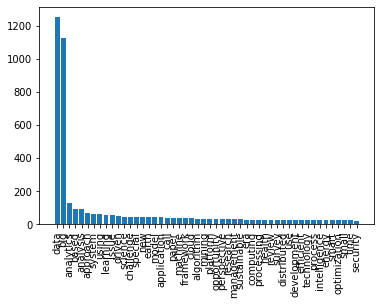

In [15]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 'vertical')
plt.show()

In [16]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count()
summary_year

,출판일,doc_count
0,2004,2
1,2011,3
2,2012,17
3,2013,43
4,2014,125
5,2015,92
6,2016,121
7,2017,135
8,2018,122
9,2019,94


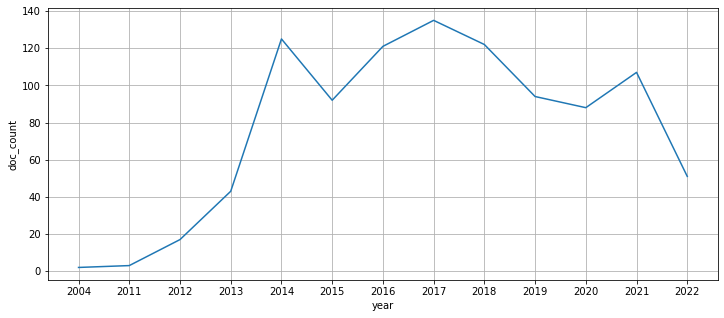

In [17]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc_count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

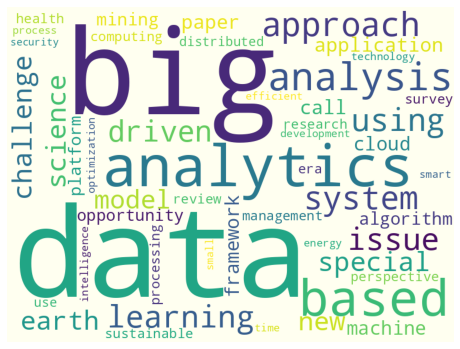

In [18]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()